# Исследование объявлений о продаже квартир

## Описание проекта

В распоряжении данные сервиса недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**План**
1. [Первичное ознакомление с данными](#part_1)
2. [Преобработка данных](#part_2)
3. [Исследовательский анализ данных](#part_3)
      * [Общая площадь](#part_31)
      * [Жилая площадь](#part_32)
      * [Площадь кухни](#part_33)
      * [Стоимость](#part_34)
      * [Комнаты](#part_35)
      * [Высота потолков](#part_36)
      * [Этажи](#part_37)
      * [Тип этажа квартиры](#part_38)
      * [Этажность дома](#part_39)
      * [Удаленность от центра города](#part_310)
      * [Удаленность от ближайшего аэропорта](#part_311)
      * [Расстояние до парка](#part_312)
      * [День и месяц публикации](#part_313)
      * [Время продажи квартиры](#part_314)
4. [Факторы, влияющие на стоимость квартиры](#part_4)
5. [Влияние времени публикации на стоимость квартиры](#part_5)
6. [ТОП-10 населенных пунктов](#part_6)
7. [Влияние удаленности от центра города на стоимость](#part_7)
8. [Общий вывод](#part_8)

<a id='part_1'></a>
# Первичное ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path

In [2]:
data_file = os.path.abspath('/datasets/real_estate_data.csv')
data = pd.read_csv(data_file, sep='\t')
    
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

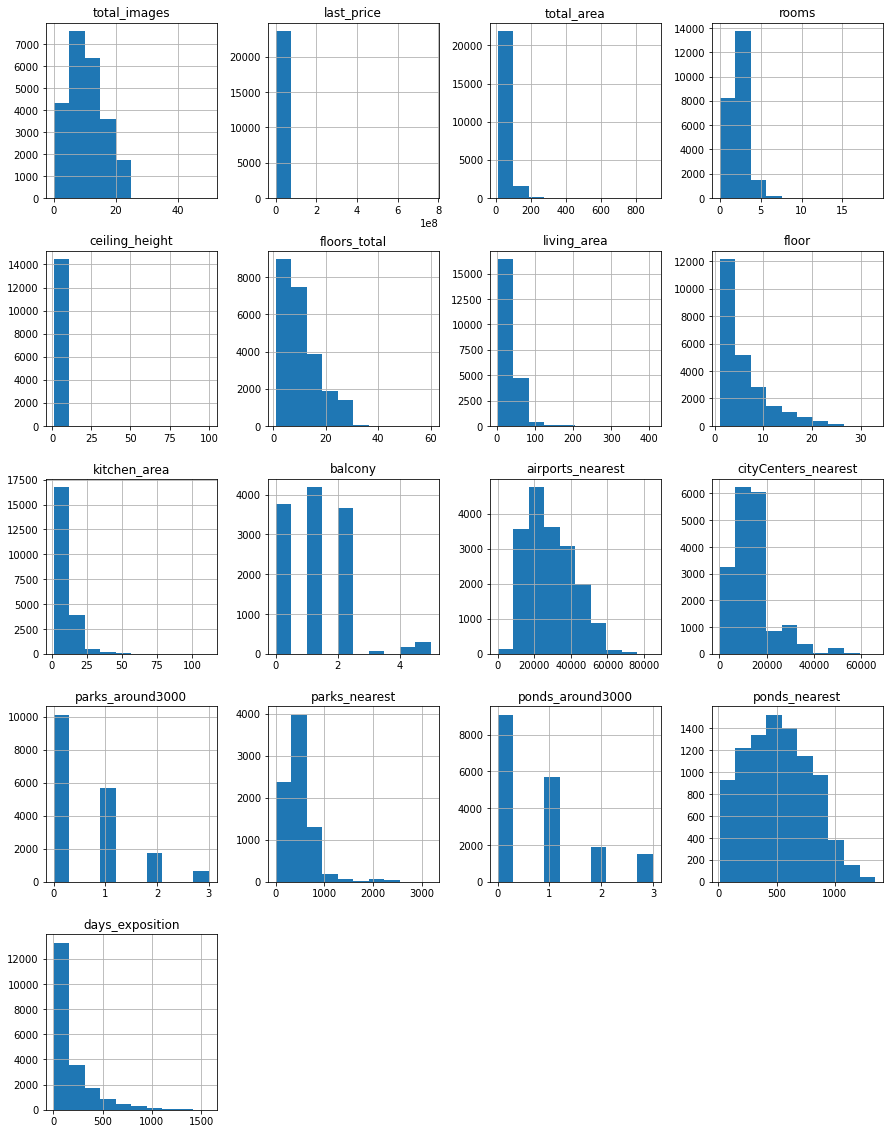

In [4]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:**  

Исходя из полученной информации видно, что всего в файле находится 23 699 строк. Из них видно, что в файле имеются пропущенные значения. Так же присутствуют аномальные выбросы (например, в столбце с высотой потолка, с жилой площадью).

<a id='part_2'></a>
# Предобработка данных

Для начала проверим названия всех столбцов и если в их названиях есть ошибки, то исправим их.

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data = data.rename(columns={'cityCenters_nearest' :'city_centers_nearest', 
                           'parks_around3000' : 'parks_around_3000',
                           'ponds_around3000' : 'ponds_around_3000'})

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Теперь переведем столбце с датой в более удобный формат для чтения.

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Займемся изучением пропуском и их устранением.

In [9]:
data.isna().sum()/len(data)*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**Вывод:** По полученным результатам видно, что в датафрейме много пропущенных значений.  

  Пропущенные данные столбцах floors_total и locality_name восстановить не получится, но поскольку таких значений крайне мало, они не повлияют на результаты исследования, поэтому мы можем их удалить.

In [10]:
data = data.dropna(subset=['locality_name', 'floors_total'])

 В столбце 'is_apartment' должно быть всего 2 значения: является ли квартира апартаментами или нет. Исходя из этого пропущенные значения скорее всего не являются апартаментами, поэтому эти пропуски можно заменить на False.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna('False')

В столбце 'balcony' в пропущенных значения вероятнее всего нет балкона, поэтому можно заменить на 0. Тот же самый вывод можно сделать по столбцам 'parks_around_3000' и 'ponds_around_3000'. Соответственно заменить пропущенные значения на 0.

In [12]:
columns_fillna = ['balcony', 'parks_around_3000', 'ponds_around_3000']
for j in columns_fillna:
    data[j] = data[j].fillna(0)

Для заполнения пропусков в столбце ceiling_height сначала сгруппируем данные по месту расположению и по количеству этажей в доме и рассчитаем медианные значения. Оставшиеся пропуски в данной колонке заполним медианой по столбцу.

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(
    data.groupby(['locality_name', 'floors_total'])['ceiling_height'].transform('median'))

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Для заполнения пропусков в столбце living_area рассчитаем с помощью процентного соотношения среднего значения жилой площади к среднему значению общей площади. Тоже самое проделаем с пропущенными значениями в столбце kitchen_area.

In [14]:
procent_living = (data['living_area'].mean() / data['total_area'].mean()) * 100

data['living_area'] = data['living_area'].fillna(data['total_area'] * procent_living)

In [15]:
procent_kitchen = (data['kitchen_area'].mean() / data['total_area'].mean()) * 100

data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * procent_kitchen)

Для заполнения пропусков в столбце city_centers_nearest, airports_nearest, parks_nearest и ponds_nearest  медианным значениями предварительно сгруппировав данные по место положению. Оставшиеся пропуски в данным колонкам заполним медианой по столбцу.

In [16]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(
    data.groupby('locality_name')['city_centers_nearest'].transform('median'))

data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

In [17]:
data['airports_nearest'] = data['airports_nearest'].fillna(
    data.groupby('locality_name')['airports_nearest'].transform('median'))
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

In [18]:
data['parks_nearest'] = data['parks_nearest'].fillna(
    data.groupby('locality_name')['parks_nearest'].transform('median'))
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

In [19]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(
    data.groupby('locality_name')['ponds_nearest'].transform('median'))
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

Пропущенные значения в столбце days_exposition появились вероятнее всего из-за того, что квартиры еще не проданы. На данном этапе оставим пропуски как есть.

При группировке по месту положения и количества этажей в доме не все пропуски были заполнены. Возможно, по причине аномальных выбросов. Поэтому оставшиеся пропуски заполняем средним значение высоты потолков без группировки.

In [20]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3171
dtype: int64

Теперь изменим тип данных в столбцах floors_total , balcony, last_price, parks_around_3000, ponds_around_3000 для удобства восприятия
1. floors_total(количество этаже в доме) и balcony(количество балконов) не может быть дробных значений в данных столбцах, поэтому целесообразно изменить их тип на целочисленный.
2. Значения столбцов parks_around_3000 и ponds_around_3000 показывают количество парков и водоемов в радиусе 3 км, поэтому здесь тоже не может быть дробных значений. Меняем на целочисленный тип.
3. Значения столбца last_price - это стоимость объекта на момент снятия объявления (продажи). Цены на недвижимость, как правило округляют и копейки не прописывают. Поэтому здесь мы тоже меняем на целочисленный тип данных.
4. Значения столбцов total_area, living_area и kitchen_area на тип float32 для экономии памяти.

In [21]:
row = ['floors_total', 'balcony', 'last_price', 'parks_around_3000', 'ponds_around_3000'] 

for i in row:
    data[i] = data[i].astype('int')

In [22]:
square = ['total_area', 'living_area', 'kitchen_area']

for k in row:
    data[k] = data[k].astype('float32')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float32       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float32       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Теперь проверим датафрейм на наличие явных и неявных дубликатов. 

In [24]:
data.duplicated().sum()

0

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
def replace_locality_name(locality_name):
    for i in range(len(locality_name)):
        if locality_name[i].isupper():
            return locality_name[i: len(locality_name)]
        

data['locality_name'] = data['locality_name'].apply(replace_locality_name)

In [27]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Теперь добавим новые столбцы, которые нам понадобятся для дальнейшего исследования:
1. Столбец cost_sq_meter - стоимость одного метра квадратного
2. Столбец weekday с указанием дня недели публикации
3. Столбец month - месяц публикации объявления
4. Столбец year  - год публикации объявления
5. Столбец floor_group -с группировкой расположения этажа квартиры
6. Столбец city_center_km - расстояние до центра населенного пункта в километрах


In [28]:
data['cost_sq_meter'] = data['last_price'] / data['total_area']

In [29]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [30]:
data['month'] = data['first_day_exposition'].dt.month

In [31]:
data['year'] = data['first_day_exposition'].dt.year

In [32]:
data['city_center_km'] = data['city_centers_nearest'] / 1000
data['city_center_km'] = round(data['city_center_km'])

In [33]:
def flat_group_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
    
    

data['floor_group'] = data.apply(flat_group_floor, axis=1)

In [34]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_sq_meter,weekday,month,year,city_center_km,floor_group
0,20,13000000.0,108.00,2019-03-07,3,2.700,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,7,3350000.0,40.40,2018-12-04,1,2.650,11.0,18.600000,1,False,...,460.0,0.0,584.5,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.00,2015-08-20,2,2.600,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0,другой
3,0,64900000.0,159.00,2015-07-24,3,2.600,14.0,9081.664753,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,7.0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.030,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,8.0,другой
5,10,2890000.0,30.40,2018-09-10,1,2.625,12.0,14.400000,5,False,...,460.0,0.0,504.0,55.0,95065.789474,0,9,2018,13.0,другой
6,6,3700000.0,37.30,2017-11-02,1,2.600,26.0,10.600000,6,False,...,733.0,0.0,593.0,155.0,99195.710456,3,11,2017,19.0,другой
7,5,7915000.0,71.60,2019-04-18,2,2.750,24.0,4089.605008,22,False,...,460.0,0.0,504.0,NaN,110544.692737,3,4,2019,12.0,другой
8,20,2900000.0,33.16,2018-05-23,1,2.650,27.0,15.430000,26,False,...,460.0,0.0,504.0,189.0,87454.764777,2,5,2018,13.0,другой
9,18,5400000.0,61.00,2017-02-26,3,2.500,9.0,43.600000,7,False,...,460.0,0.0,504.0,289.0,88524.590164,6,2,2017,15.0,другой


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float32       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float32       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Теперь разберемся с аномальными значениями в столбце ceiling_height

In [36]:
data['ceiling_height'].unique()

array([  2.7  ,   2.65 ,   2.6  ,   3.03 ,   2.625,   2.75 ,   2.5  ,
         2.67 ,   2.55 ,   2.56 ,   3.05 ,   3.   ,   2.9  ,   2.8  ,
         2.76 ,   3.2  ,   2.645,   2.61 ,   2.54 ,   3.15 ,   3.25 ,
         3.45 ,   2.77 ,   2.85 ,   2.64 ,   2.57 ,   4.15 ,   3.5  ,
         3.3  ,   2.71 ,   4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,
         2.675,   2.34 ,   3.4  ,   2.52 ,   3.06 ,   2.72 ,   2.51 ,
         2.78 ,  13.85 ,   2.725,  25.   ,   2.58 ,   3.7  ,  14.85 ,
         5.2  ,   2.575,   2.525,   2.745,   2.87 ,   2.66 ,   2.775,
         2.59 ,   2.   ,   2.45 ,   3.6  ,   5.   ,   2.92 ,   2.505,
         3.11 ,   3.13 ,   2.735,   3.8  ,   3.55 ,   3.16 ,   3.62 ,
         3.12 ,   2.53 ,   2.565,   2.74 ,   2.96 ,   2.46 ,   5.3  ,
         2.79 ,   2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,
         2.83 ,   3.325,   4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,
         2.65 ,   3.65 ,   3.9  ,   3.18 ,   3.35 ,   2.3  ,   3.57 ,
         2.48 ,   2.

В списке уникальных значений есть аномальные выбросы. Например, высота потолка 27.5 или 22.6. Скорее всего эти аномалии возникли из-за человеческого фактора. Избавимся от них.

In [37]:
def correct_ceiling_height(rows):
    try:
        if  rows <= 9:
            return rows 
        elif 10 <= rows:
            return rows / 10
    except:
        pass 
    

data['ceiling_height'] = data['ceiling_height'].apply(correct_ceiling_height)

In [38]:
data['ceiling_height'].unique()

array([ 2.7  ,  2.65 ,  2.6  ,  3.03 ,  2.625,  2.75 ,  2.5  ,  2.67 ,
        2.55 ,  2.56 ,  3.05 ,  3.   ,  2.9  ,  2.8  ,  2.76 ,  3.2  ,
        2.645,  2.61 ,  2.54 ,  3.15 ,  3.25 ,  3.45 ,  2.77 ,  2.85 ,
        2.64 ,  2.57 ,  4.15 ,  3.5  ,  3.3  ,  2.71 ,  4.   ,  2.47 ,
        2.73 ,  2.84 ,  3.1  ,  2.675,  2.34 ,  3.4  ,  2.52 ,  3.06 ,
        2.72 ,  2.51 ,  2.78 ,  1.385,  2.725,  2.58 ,  3.7  ,  1.485,
        5.2  ,  2.575,  2.525,  2.745,  2.87 ,  2.66 ,  2.775,  2.59 ,
        2.   ,  2.45 ,  3.6  ,  5.   ,  2.92 ,  2.505,  3.11 ,  3.13 ,
        2.735,  3.8  ,  3.55 ,  3.16 ,  3.62 ,  3.12 ,  2.53 ,  2.565,
        2.74 ,  2.96 ,  2.46 ,  5.3  ,  2.79 ,  2.95 ,  4.06 ,  2.94 ,
        3.82 ,  3.54 ,  3.53 ,  2.83 ,  3.325,  4.7  ,  2.4  ,  3.38 ,
        3.01 ,  5.6  ,  2.65 ,  3.65 ,  3.9  ,  3.18 ,  3.35 ,  2.3  ,
        3.57 ,  2.48 ,  2.62 ,  2.82 ,  3.98 ,  2.63 ,  3.83 ,  2.715,
        3.52 ,  3.95 ,  3.75 ,  2.88 ,  3.67 ,  3.87 ,  3.66 ,  3.85 ,
      

Подозрительно выглядят графики со столбцами rooms, last_price, total_area, kitchen_area, living_area, ceiling_height и days_exposition. 
Есть квартиры с невероятным количеством комнат, очень высокой и низкой стоимость квартир, нереально маленькими и нереально большими площадями кухонь и жилой части, а так же есть некоторое количество объявлений с квартирами, которые еще не были проданы.

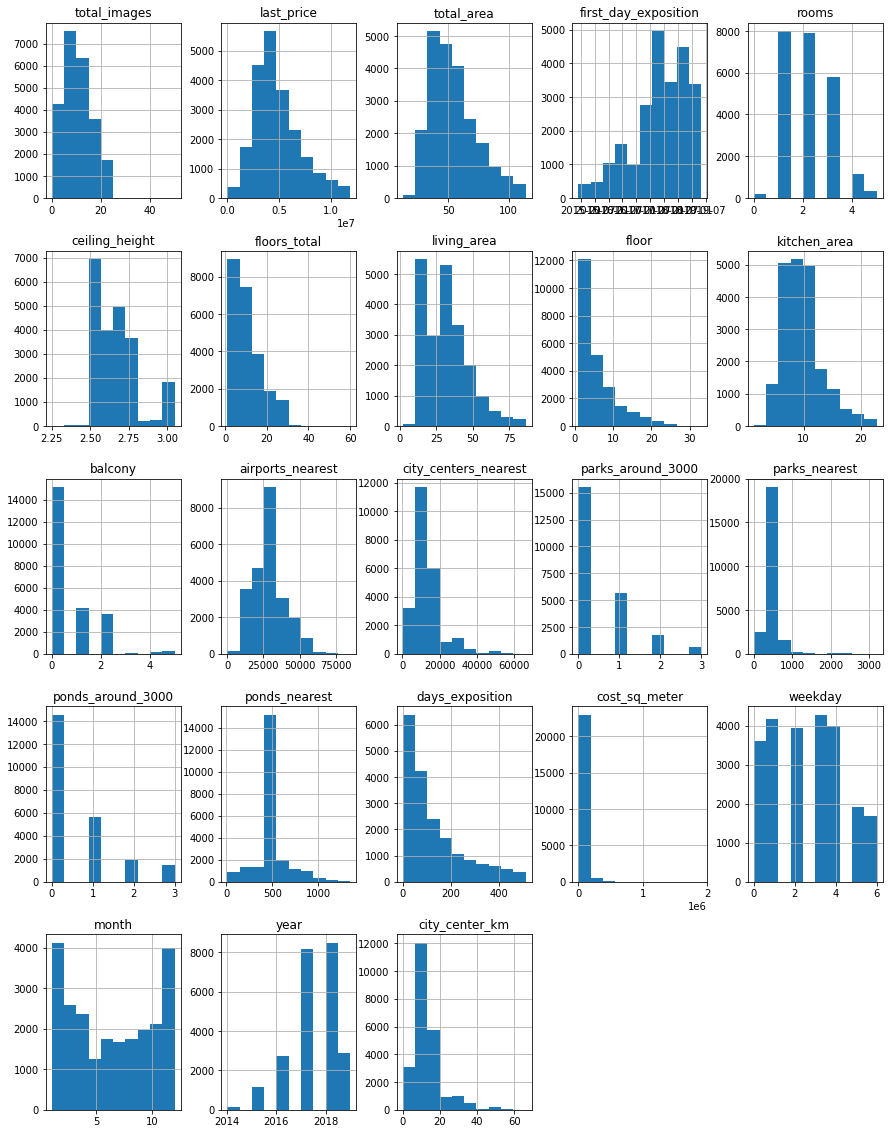

In [39]:
def span_diagram(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    real_data = data.loc[(data[column] < Q3 + 1.5*IQR) & (data[column] > Q1 - 1.5*IQR), column]
    return real_data



list_columns_anomal = ['rooms', 'last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 
                       'ceiling_height']


for t in list_columns_anomal:
    data[t] = span_diagram(data, t)
    

data.hist(figsize= (15, 20))
plt.show()

Данные после отброса аномальных значений выглядят уже более реалистичными. И с этим уже можно работать.

<a id='part_3'></a>
# Исследовательский анализ данных

Изучим подробнее данные из столбца с общей площадью квартир.

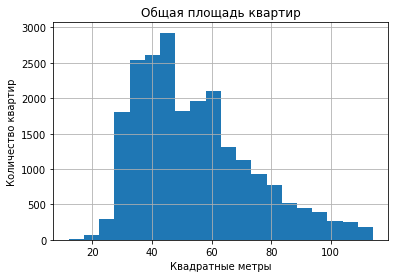

'Наиболее популярные площади квартир:'

45.0    419
42.0    383
31.0    346
60.0    346
44.0    343
40.0    315
43.0    300
32.0    289
46.0    281
50.0    279
Name: total_area, dtype: int64

'Квартира с наибольшей общей площадью'

114.2

'Квартира с наименьшей общей площадью'

12.0

In [40]:
plt.hist(data['total_area'], bins=20)
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Наиболее популярные площади квартир:')
display(data['total_area'].value_counts(ascending=False).head(10))

display('Квартира с наибольшей общей площадью', data['total_area'].max())
display('Квартира с наименьшей общей площадью', data['total_area'].min())


<a id='part_31'></a>
**Общая площадь**   

  У большинства квартир, выставленных на продажу, общая площадь находится в диапазоне 30-60 м2. На гистограмме общей площади квартир видно, что количество квартир площадью более 60 м2 начинает снижаться. 

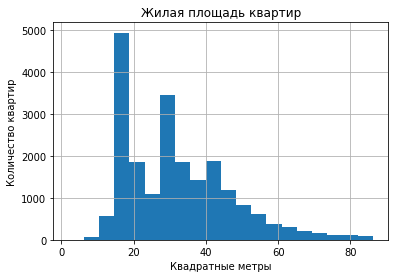

'Наиболее популярные жилые площади квартир:'

18.0    882
17.0    673
30.0    598
16.0    483
20.0    479
28.0    422
31.0    379
19.0    327
29.0    317
32.0    317
Name: living_area, dtype: int64

'Квартира с наибольшей жилой площадью'

86.2

'Квартира с наименьшей жилой площадью'

2.0

In [41]:
plt.hist(data['living_area'], bins=20)
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Наиболее популярные жилые площади квартир:')
display(data['living_area'].value_counts(ascending=False).head(10))

display('Квартира с наибольшей жилой площадью', data['living_area'].max())
display('Квартира с наименьшей жилой площадью', data['living_area'].min())

<a id='part_32'></a>
**Жилая площадь**

Наиболее распространенные жилые площади квартир от 16 до 32 м2. Жилая площадь более 32 м2 встречается реже. Так же наблюдается снижение количества квартир при увеличении жилой площади. Появление второго пика на графике можно связать с количество комнат, например первый пик - однокомнатные квартиры, второй пик - 2-хкомнатные или 3-хкомнатные квартиры. Квартира с жилой площадью 2.0 м2 выглядит крайне нереалистично. Возможно, при создании публикации о продаже человек не дописал 0 и жилая площадь вместо 20 м2, стала 2 м2.

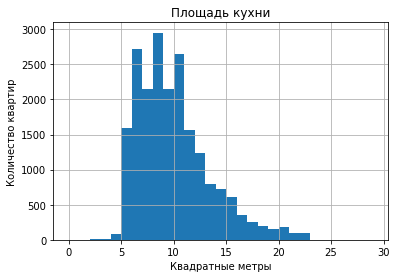

'Наиболее популярные площади кухни:'

6.0     1298
10.0    1259
8.0     1108
9.0     1099
7.0     1062
11.0     794
12.0     658
8.5      414
5.5      399
14.0     381
Name: kitchen_area, dtype: int64

'Квартира с наибольшей площадью кухни'

22.78

'Квартира с наименьшей площадью кухни'

1.3

In [42]:
plt.hist(data['kitchen_area'], bins=range(0, 30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Наиболее популярные площади кухни:')
display(data['kitchen_area'].value_counts(ascending=False).head(10))

display('Квартира с наибольшей площадью кухни', data['kitchen_area'].max())
display('Квартира с наименьшей площадью кухни', data['kitchen_area'].min())

<a id='part_33'></a>
**Площадь кухни**

 Чаще всего кухни встречаются размером от 5.5 до 12 м2. Кухни с меньшей площадью встречаются крайне редко. Так же наблюдается спад для кухни с площадью более 12 м2. Такие вариант встречаются реже. Площадь кухни размером 1.3 м2 тоже выглядит крайне нереалистично. Возможно, такая аномалия возникла из-за человеческого фактора при создании объявления. Человек случайно поставил точку после 1.

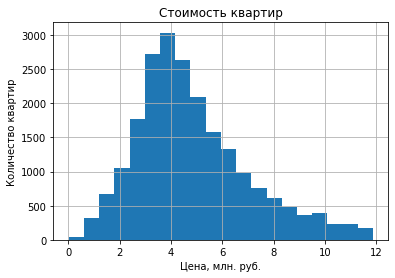

'Рейтинг стоимости квартир:'

4.5    341
3.5    289
4.0    260
4.3    260
4.2    258
3.6    256
3.3    243
3.8    240
3.2    237
3.7    233
Name: last_price, dtype: int64

'Наибольшая стоимость квартиры'

11866860.0

'Наименьшая стоимость квартиры'

12190.0

In [43]:
plt.hist((data['last_price'] / 1000000), bins=20)
plt.title('Стоимость квартир')
plt.xlabel('Цена, млн. руб.')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Рейтинг стоимости квартир:')
display((data['last_price'] / 1000000).value_counts(ascending=False).head(10))

display('Наибольшая стоимость квартиры', data['last_price'].max())
display('Наименьшая стоимость квартиры', data['last_price'].min())

<a id='part_34'></a>
**Стоимость**

 Наиболее часто продают квартиры по стоимости в диапазоне от 3.2 млн до 4.5 млн. Очевидно это связано с средней рыночной стоимостью квартир в данном районе. Самая дорогая квартира имеет стоимость более 10 млн. Самая дешевая - 12 190, что выглядит крайне подозрительно. Возможно, при создании объявления была ошибка человеческого фактора. Например, человек хотел разместить объявление об аренде квартиры, а разместил о продаже. Как вариант, человек мог ошибиться в заполнении стоимости квартиры и просто не дописать нули.

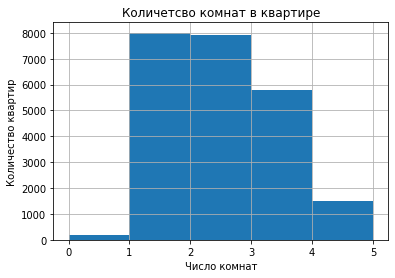

'Рейтинг квартир по количеству комнат:'

1.0    8004
2.0    7897
3.0    5779
4.0    1172
5.0     325
0.0     194
Name: rooms, dtype: int64

In [44]:
plt.hist(data['rooms'], bins=5)
plt.title('Количетсво комнат в квартире')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Рейтинг квартир по количеству комнат:')
data['rooms'].value_counts(ascending=False)


<a id='part_35'></a>
**Комнаты**

 Наиболее часто встречаются квартиры с 1, 2 и 3 комнатами. При этом наиболее популярны квартиры с 1 или 2 комнатами. Квартиры с 4 и более встречаются крайне редко. Вероятнее всего квартиры с таким большим количество комнат мало востребованы.

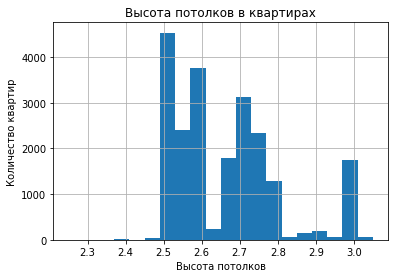

'Наиболее часто встречающиеся высоты потолков:'

2.50    4331
2.60    3538
2.70    2977
2.55    2087
2.75    2033
3.00    1736
2.65    1653
2.80    1076
2.90     184
2.76     154
Name: ceiling_height, dtype: int64

'Максимальная высота потолка'

3.05

'Минимальная высота потолка'

2.25

In [45]:
plt.hist(data['ceiling_height'], bins=20)
plt.title('Высота потолков в квартирах')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()



display('Наиболее часто встречающиеся высоты потолков:')
display(data['ceiling_height'].value_counts(ascending=False).head(10))

display('Максимальная высота потолка', data['ceiling_height'].max())
display('Минимальная высота потолка', data['ceiling_height'].min())

<a id='part_36'></a>
**Высота потолков**

  При исследовании высоты потолков видно, что чаще всего встречается высота 2.5, 2.6 и 2.7 метров. Квартиры с промежуточными вариантами между этими значения встречаются реже. Самый высокий потолок 3.05 м. Но такие квартиры встречаются не очень часто. 

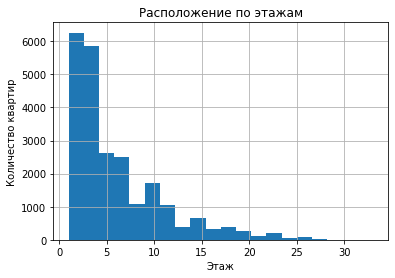

'Наиболее популярные этажи квартир:'

2     3351
3     3061
1     2909
4     2793
5     2612
6     1293
7     1211
8     1075
9     1045
10     684
Name: floor, dtype: int64

'Самый высокий этаж квартиры:'

33

In [46]:
plt.hist(data['floor'], bins=20)
plt.title('Расположение по этажам')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Наиболее популярные этажи квартир:')
display(data['floor'].value_counts(ascending=False).head(10))

display('Самый высокий этаж квартиры:', data['floor'].max())

<a id='part_37'></a>
**Этажи**

 Больше всего выставляют на продажу выставляют квартиры, которые располагаются с 1 по 10 этаж. Так же наблюдается снижение количества квартир на продаже с увеличение этажа. Наиболее часто встречаются квартиры в домах с этажами 5, 9, 10 и 16 этажей. Возможно такие дома чаще строят, так как они пользуются большей популярностью, чем дом с большим количеством этажей.

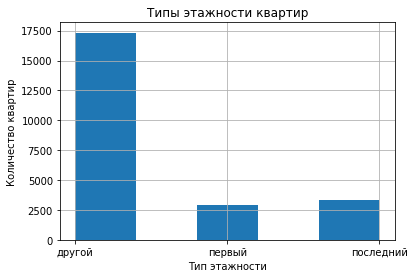

'Рейтинг типов этажности квартир:'

другой       17326
последний     3330
первый        2909
Name: floor_group, dtype: int64

In [47]:
plt.hist(data['floor_group'], bins=5)
plt.title('Типы этажности квартир')
plt.xlabel('Тип этажности')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Рейтинг типов этажности квартир:')
data['floor_group'].value_counts(ascending=False).head(10)


<a id='part_38'></a>
**Тип этажа квартиры**

По результатам выведения гистограммы по типам этажа. Видно, что наибольшей популярностью пользуются квартиры расположенные между первым и последним этажом. Квартиры на первом и последнем этаже покупают меньше. Возможно, это связано с влиянием других факторов (заглядывание в окна прохожих, протечки крыши дома).

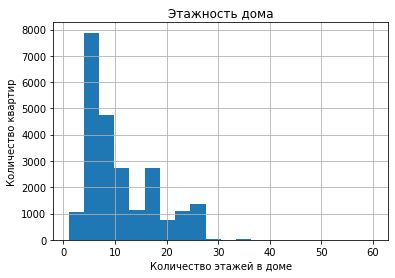

'Наиболее популярные количества этажей в доме:'

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
Name: floors_total, dtype: int64

'Дом с наибольшим количеством этажей'

60.0

'Дом с наименьшим количеством этажей'

1.0

In [48]:
plt.hist(data['floors_total'], bins=20)
plt.title('Этажность дома')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Наиболее популярные количества этажей в доме:')
display(data['floors_total'].value_counts(ascending=False).head(10))

display('Дом с наибольшим количеством этажей', data['floors_total'].max())
display('Дом с наименьшим количеством этажей', data['floors_total'].min())

<a id='part_39'></a>
**Этажность дома**

 Наиболее полярными домами являются дома с 5, 9, 10 и 16 этажами. Это выглядит логично, поскольку в основном строители строят дома именно с таким количеством этажей. Дом с 60 этажами можно назвать уже небоскребом. Например, такие же высокие дома можно увидеть в Москва-сити.

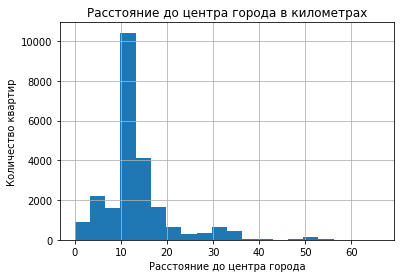

'Рейтинг расположения квартир по удаленности от центра города:'

13.0    6883
12.0    1658
15.0    1561
14.0    1276
16.0    1265
11.0    1170
5.0      915
17.0     896
10.0     718
4.0      688
Name: city_center_km, dtype: int64

In [49]:
plt.hist(data['city_center_km'], bins=20)
plt.title('Расстояние до центра города в километрах')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Рейтинг расположения квартир по удаленности от центра города:')
data['city_center_km'].value_counts(ascending=False).head(10)


<a id='part_310'></a>
**Удалённость от центра города**

Большинство квартир располагаются на расстояние центра города в диапазоне от 11 до 16 км. Квартиры, которые располагаются ближе к центру города значительно меньше, так же, как и квартиры, которые располагаются дальше 16 км. Маленькое количество квартир на удаленности квартир от центра города более 16 км можно объяснить те, что данные районы менее застроенные и там не так много жилых домов.


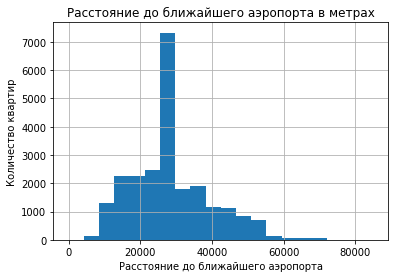

'Рейтинг расположения квартир по удаленности от аэропорта:'

26763.0    5517
37434.0      61
21928.0      32
44870.0      30
39946.0      30
37407.0      27
18732.0      27
39140.0      26
31744.0      25
37412.0      24
Name: airports_nearest, dtype: int64

In [50]:
plt.hist(data['airports_nearest'], bins=20)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Рейтинг расположения квартир по удаленности от аэропорта:')
data['airports_nearest'].value_counts(ascending=False).head(10)

<a id='part_311'></a>
**Удаленность от ближайшего аэропорта**

Многие квартиры находятся на расстоянии от 26-37 км от аэропорта. Это вполне логично, ведь мало кому хотелось бы жить рядом с аэропортом, т.к. там постоянно будет шумно из-за взлетающих и садящихся самолетов. Скачок на 27 км от аэропорта можно было бы объяснить тем, что на таком расстоянии от аэропорта находится хорошая инфраструктура, удачная транспортная развязка и т.д.


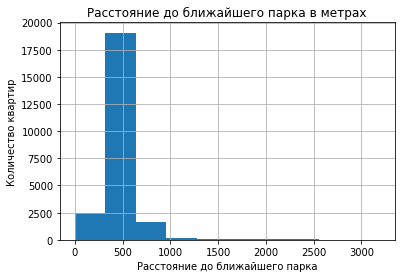

'Расстояния до ближайшего парка:'

460.0    14405
733.0      324
393.0      218
399.5      157
367.0      136
435.0      134
407.0      129
294.0       67
441.0       67
392.0       41
Name: parks_nearest, dtype: int64

In [51]:
plt.hist(data['parks_nearest'], bins=10)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

display('Расстояния до ближайшего парка:')
data['parks_nearest'].value_counts(ascending=False).head(10)


<a id='part_312'></a>
**Расстояние до ближайшего парка**

По гистограмме видно, что большинство квартир имеет рядом парки. 

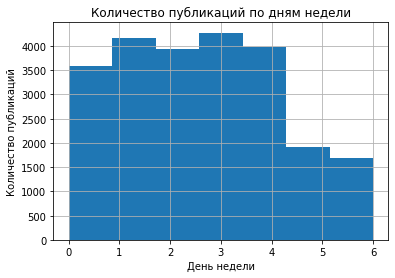

'Количество публикаций по дням недели:'

3    4276
1    4163
4    3980
2    3948
0    3596
5    1919
6    1683
Name: weekday, dtype: int64

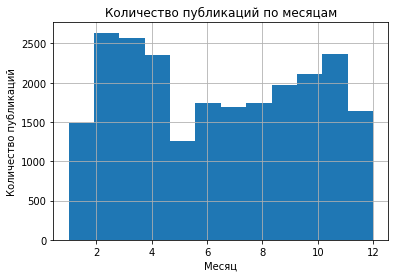

'Количество публикаций по дням недели:'

2     2636
3     2575
11    2360
4     2356
10    2108
9     1972
6     1747
8     1739
7     1686
12    1638
1     1487
5     1261
Name: month, dtype: int64

In [52]:
plt.hist(data['weekday'], bins=7)
plt.title('Количество публикаций по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество публикаций')
plt.grid(True)
plt.show()

display('Количество публикаций по дням недели:')
display(data['weekday'].value_counts(ascending=False))



plt.hist(data['month'], bins=12)
plt.title('Количество публикаций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество публикаций')
plt.grid(True)
plt.show()

display('Количество публикаций по дням недели:')
data['month'].value_counts(ascending=False)



<a id='part_313'></a>
**День и месяц публикации**

 В результате исследования по гистограммам видно, что в будние дни чаще размещаются объявляния, а вот в выходные дни количество публикаций снижается. Скорее всего это связано с тем, что многие предпочитают в эти дни отдыхать. 
  По графикам также видно в январе очень мало публикаций. Больше всего размещений приходится на февраль, март и ноябрь. Можно сказать, что спрос на квартиры в это время вероятнее всего больше, а с наступлением теплого времени спрос возможно падает. Это можно объяснить сезоном отпусков. 

  Изучим как долго продавались квартиры. Вероятнее всего причина пропусков в этом столбце, является, то, что квартиры еще не проданы, поэтому при построении графика отфильтруем эти значения.

<a id='fifth'></a>

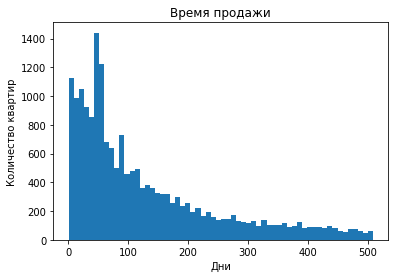

'Среднее время продажи квартир:'

128.29934298381497

'Медиана времени продаж квартир:'

85.0

count    18721.000000
mean       128.299343
std        121.064671
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64

In [53]:
plt.hist(data.query('days_exposition.notna()')['days_exposition'], bins=60)
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()


mean_days_exposition = data.query('days_exposition.notna()')['days_exposition'].mean()
median_days_exposition = data.query('days_exposition.notna()')['days_exposition'].median()


display('Среднее время продажи квартир:', mean_days_exposition)
display('Медиана времени продаж квартир:', median_days_exposition)


data.query('days_exposition.notna()')['days_exposition'].describe()

<a id='part_314'></a>
**Время продажи квартир**
 
 
  Среднее время продажи квартиры - 128 дней. Это около 4 месяцев.
  Медианное время продажи квартиры составляет 85 дня (около 3 месяцев) со дня публикации. 
  
   В основном квартиры продаются в течении периода 100 дней, затем, судя по гистограмме, шансы на продажу начинают резко снижаться. Самая долгая продажа составляла 509 дней со дня публикации.
   
 

Построим дополнительный график по времени продажи квартир, где отдельно рассмотрим более подробно значения до 100 дней.

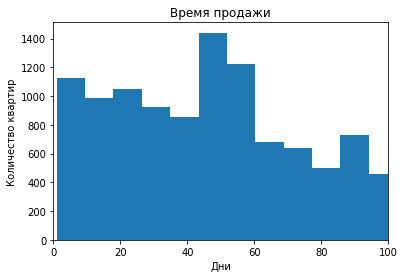

In [54]:
plt.hist(data.query('days_exposition.notna()')['days_exposition'], bins=60)
plt.title('Время продажи')
plt.xlim([0, 100])
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

**Время продажи в период до 100 дней**

По полученной гистограмме видно, что чаще всего квартиры продаются в период 45-60 дней со дня публикации. Но на графике также видно, что много квартир было продано в период от 1 до 30 дней со дня публикации. Также видно, что если квартира не продалась в период до 60 дней с момента публикации, то после прохождения этого порога шансы на продажу начинают снижаться. Возможно, это связано с тем, что объявление находясь столько времени на сайте начинает опускаться в рейтинге объявлений и не так часто мелькает в начале списка по запросам покупателей. 


Быстрой продажей квартиры можно считать те, которые произошли в течении 10-20 дней со дня публикации. Долгими продажами можно считать те, которые превысили порог в 200 дней со дня публикации (более 6 месяцев).


<a id='part_4'></a>
# Факторы, влияющие на стоимость квартиры
Теперь изучим факторы, влияющие на стоимость квартиры.

'Корреляция цены и площади:'

,last_price,total_area
last_price,1.000000,0.905372
total_area,0.905372,1.000000


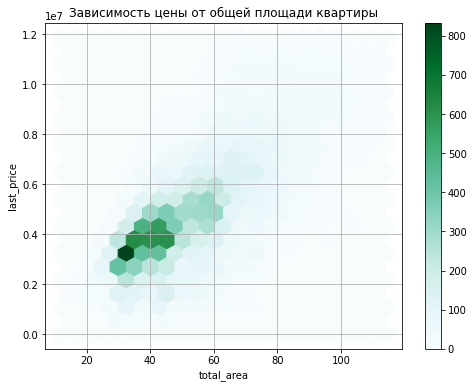

In [55]:
(data.plot(x='total_area',
           y='last_price',
           title='Зависимость цены от общей площади квартиры',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True)
)


display('Корреляция цены и площади:', data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

**Вывод:** По полученным результатам видно, что на стоимость квартиры сильное влияние оказывает общая площадь квартиры.

'Корреляция цены и жилой площади:'

,last_price,living_area
last_price,1.000000,0.709484
living_area,0.709484,1.000000


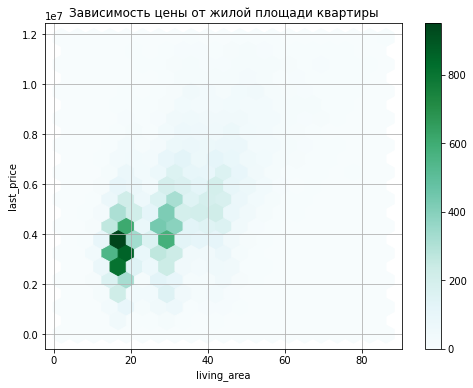

In [56]:
(data.plot(x='living_area',
           y='last_price',
           kind='hexbin',
           title='Зависимость цены от жилой площади квартиры',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True)
)

display('Корреляция цены и жилой площади:', 
        data.pivot_table(index='floor', values=['living_area', 'last_price']).corr())

**Вывод:** По полученным результатам видно, что между стоимостью квартиры и жилой площадью есть взаимосвязь. Но следует отметить, что эта взаимосвязь слабее, чем от общей площади квартиры. Это логично, т.к. на стоимость также будут влиять другие виды площадей (например, площадь кухни).

'Корреляция цены и жилой площади:'

,kitchen_area,last_price
kitchen_area,1.000000,0.573017
last_price,0.573017,1.000000


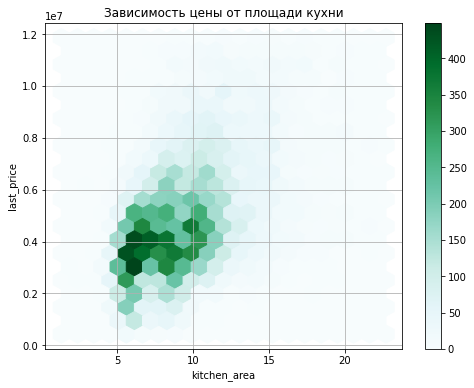

In [57]:
(data.plot(x='kitchen_area',
           y='last_price',
           title='Зависимость цены от площади кухни',
           kind='hexbin',
           gridsize=20,
           figsize=(8, 6),
           sharex=False,
           grid=True)
)

display('Корреляция цены и жилой площади:', 
        data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())

**Вывод:** Видно, что площадь кухни оказывает влияние на стоимость квартиры, но эта взаимосвязь слабее, чем от общей площади и жилой площади. При покупке квартиры люди как правило обращают большее внимание на общую площадь и на жилую, чем на площадь кухни.

'Корреляция цены и количества комнат:'

,last_price,rooms
last_price,1.000000,0.550944
rooms,0.550944,1.000000


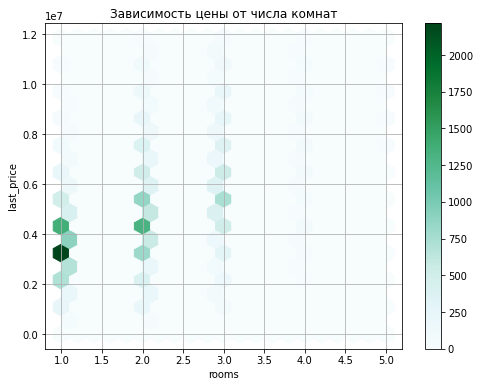

In [58]:
(data.query('rooms > 0')
 .plot(x='rooms',
       y='last_price',
       kind='hexbin',
       title='Зависимость цены от числа комнат',
       gridsize=20,
       figsize=(8, 6),
       sharex=False,
       grid=True)
)

display('Корреляция цены и количества комнат:', data.pivot_table(index='floor', values=['rooms', 'last_price']).corr())

**Вывод:** В результате исследования видно, что зависимость цены от количества комнат имеется, но она не такая сильная. Ведь квартира может иметь 1 комнату, но при этом одна комната будет иметь большую площадь. 

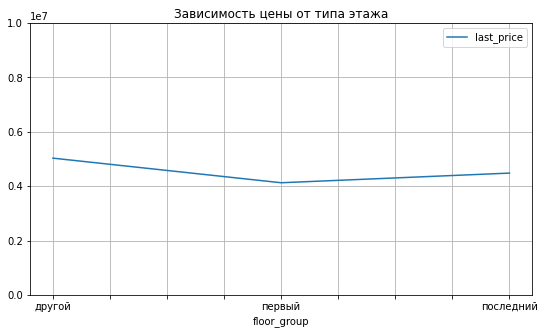

In [59]:
(data.pivot_table(index='floor_group', values='last_price')
 .plot(ylim=([0,10000000]), title='Зависимость цены от типа этажа', grid=True, figsize=(9, 5))
)
plt.show()


**Вывод:** На графике видно, что стоимость квартир, расположенных между первым и последним этажом, выше в сравнении со стоимостью квартир на первом этаже и на последнем. Снижение стоимости можно объяснить тем, что есть влияние еще других факторов.

In [60]:
(data
 .pivot_table(index='floor', values=['last_price', 'rooms', 'total_area', 'kitchen_area', 'living_area'])
 .corr()
)

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.573017,0.188956,0.155488,0.524510
last_price,0.573017,1.000000,0.709484,0.550944,0.905372
living_area,0.188956,0.709484,1.000000,0.905607,0.905178
rooms,0.155488,0.550944,0.905607,1.000000,0.785091
total_area,0.524510,0.905372,0.905178,0.785091,1.000000


**Выводы**
 
 Наибольше влияние на стоимость квартиры оказывает общая площадь квартиры. При увеличении площади квартиры, увеличивается ее стоимость. Также на стоимость квартиры достаточно сильно влияет жилая площадь, но в меньшей степени, чем общая площадь. А вот площадь кухни оказывает не очень сильное влияние на стоимость, хотя между ними тоже существует взаимосвязь. На стоимость квартиры также влияет количество комнат, но эта взаимосвязь слабее, чем с площадью.
 
 Самая низкая стоимость наблюдается у квартир, расположенных на первом этаже. Последний этаж немного дороже первого. Больше всего стоимость у квартир, которые расположены между 1 и последним этажами.

<a id='part_5'></a>
# Влияние времени публикации на стоимость квартиры

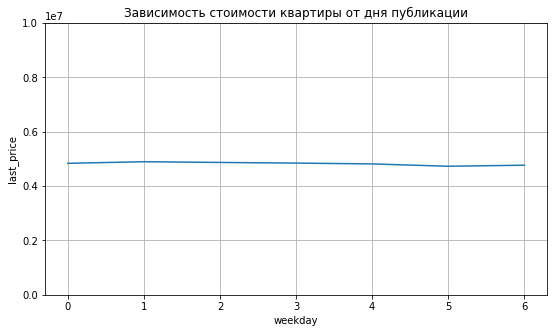

In [61]:
(data.pivot_table(index='weekday', values='last_price')
 .plot(ylabel='last_price',
       title='Зависимость стоимости квартиры от дня публикации',
       ylim=([0, 10000000]),
       legend=None,
       grid=True, 
       figsize=(9, 5))
)
plt.show()

**Вывод**

 Зависимости стоимости квартиры от дня недели публикации не выявлено.


Посмотрим изменение стоимости м2 по дням недели.

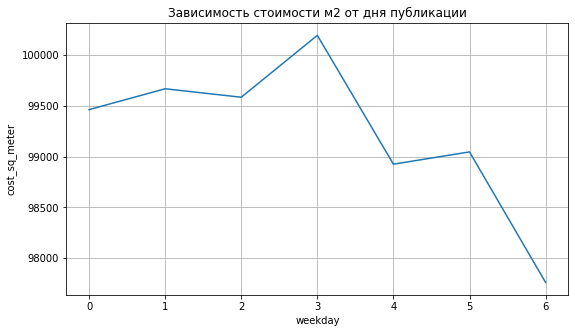

In [62]:
(data.pivot_table(index='weekday', values='cost_sq_meter')
 .plot(ylabel='cost_sq_meter',
       title='Зависимость стоимости м2 от дня публикации',
       legend=None,
       grid=True, 
       figsize=(9, 5))
)
plt.show()

**Вывод:** При изучении изменения стоимости м2 по дням недели. Видно, что в выходные дни стоимость м2 сильно снижается. Наибольшая цена за м2 наблюдается в четверг. Поскольку гистограмма м2 заметно отличается от гистограммы стоимости квартиры, можно сделать вывод, что такие перепады связаны скорее всего с изменением площади продаваемых квартиры.

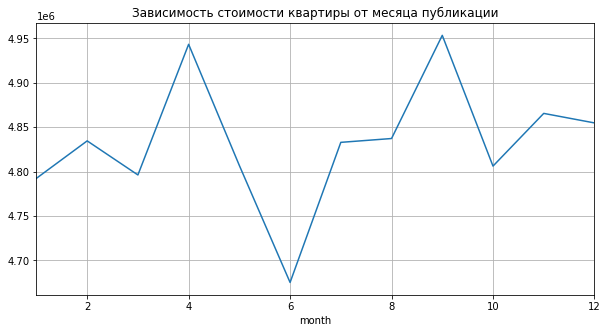

In [63]:
(data.pivot_table(index='month', values='last_price')
    .plot(title='Зависимость стоимости квартиры от месяца публикации', 
          legend=None,
          grid=True,
          xlim=(1,12),
          figsize=(10, 5))
)
plt.show()

**Вывод**

Дороже всего квартиры продаются в апреле и сентябре. Самая низкая стоимость квартир наблюдается в июне месяце. Возможно в это время большинство людей в отпусках и покупка квартир их не интересует. А вот в апреле и сентябре очевидно спрос растет, от этого и растет стоимость.

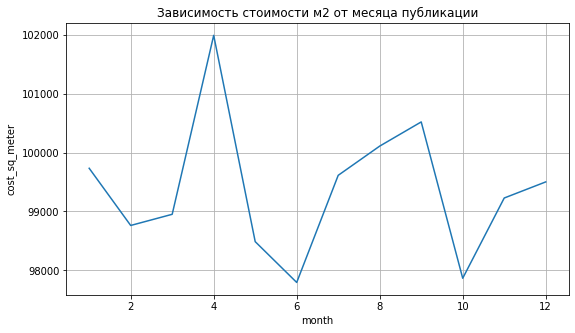

In [64]:
(data.pivot_table(index='month', values='cost_sq_meter')
 .plot(ylabel='cost_sq_meter',
       title='Зависимость стоимости м2 от месяца публикации',
       legend=None,
       grid=True, 
       figsize=(9, 5))
)
plt.show()

**Вывод:** По гистограмме видно, что наибольшая стоимость м2 квадратного приходится на апрель. Самая низкая стоимость м2 наблюдается в июне и октябре. Гистограмма зависимости м2 от месяца публикации схожа с гистограммой зависимости стоимости квартиры от месяца публикации. Исходя из этого можно сделать вывод, что снижение стоимости в июне, может быть связано с сезоном отпусков. А вот резкий провал в октябре показывает, что в этот период продавались квартиры больших площадей.

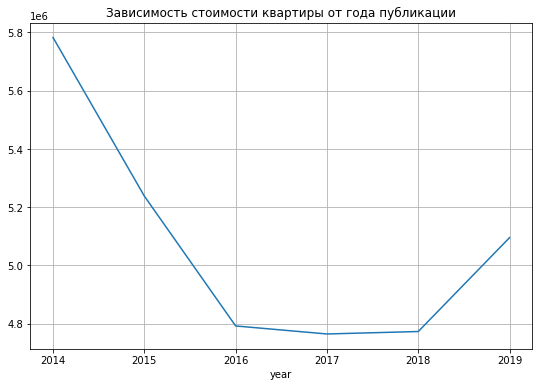

In [65]:
(data.pivot_table(index='year', values='last_price')
    .plot(title='Зависимость стоимости квартиры от года публикации', 
          legend=None,
          grid=True,
          figsize=(9, 6))
)
plt.show()

**Вывод**

Самая высокая стоимость квартир наблюдается в 2014 году. В период с 2014 по 2016 гг наблюдается резкое падение стоимости на недвижимость. Оказать такое влияние мог кризис 2014-2015 гг. В период с 2018 по 2019 гг. наблюдается небольшой рост стоимости квартир.

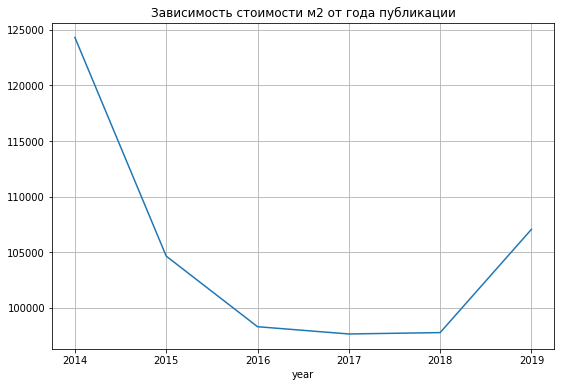

In [66]:
(data.pivot_table(index='year', values='cost_sq_meter')
    .plot(title='Зависимость стоимости м2 от года публикации', 
          legend=None,
          grid=True,
          figsize=(9, 6))
)
plt.show()

**Вывод:** Гистограмма зависимости стоимости м2 по годам схожа с гистограммой стоимости квартиры по годам. Из чего можно сделать вывод, что снижение стоимости квартиры по годам все-таки связано со снижением стоимости метра квадратного.

<a id='part_6'></a>
# Топ-10 населенных пунктов 

In [67]:
expensive_ten_city = data['locality_name'].value_counts().head(10)


top_expensive_city = (
    (data
     .query('locality_name in (@expensive_ten_city.index)')
     .pivot_table(index='locality_name', values='cost_sq_meter', aggfunc='mean')
     
    )
)
top_expensive_city = top_expensive_city.sort_values('cost_sq_meter',ascending=False).reset_index()
      
display('Топ-10 самых районов по стоимости квадратного метра', top_expensive_city)


'Топ-10 самых районов по стоимости квадратного метра'

,locality_name,cost_sq_meter
0,Санкт-Петербург,114868.877341
1,Пушкин,103125.819291
2,Кудрово,95260.846171
3,Парголово,90175.913458
4,Мурино,86041.116064
5,Шушары,78551.344545
6,Колпино,75424.579098
7,Гатчина,68746.146763
8,Всеволожск,68654.473986
9,Выборг,58141.909153


**Вывод**

  Дороже всего метр квадратный стоит в Санкт-Петербурге. Его средняя стоимость составляет около 115 тысяч за 1 метр квадратный.
  
  Самая низкая стоимость квадратного метра в Выборге. Средняя стоимость метра квадратного составляет около 58 тысяч. 
  
  Такую разницу можно объяснить многими факторами. Например:
  * Численностью населения населенного пункта
  * Инфраструктурой города
  
  и т.д.


<a id='part_7'></a>
# Влияние удаленности от центра города на стоимость

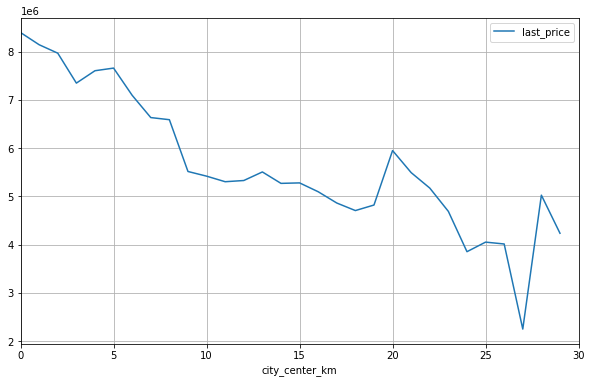

In [68]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_km', values='last_price')
    .plot(grid=True, xlim=(0,30), figsize=(10, 6))
)
plt.show()

**Вывод**

  По полученному графику видно, что наблюдается снижение стоимости по мере увеличения километража от центра города. Также на графике видны небольшие всплеск на стоимости на расстоянии примерно 20 и 28 км от центра. Возможно такое влияние мог оказать другой внешний фактор. Например, наличие парков поблизости или водоемов, наличие хорошей транспортной развязки, позволяющей без пробок добраться в любом направлении города. Также большое влияние могла оказать площадь квартир в этом районе.

<a id='part_8'></a>
# Общий вывод

Исходя из полученных результатов можно сделать следующие выводы:

* Обычно квартиры продаются в течении 100 дней со дня публикации. Такую продажу можно считать нормой. При нахождении объявления на сайте более 60 дней шансы продажи начинают резко снижаться.  Так же мы видим, что есть квартиры, которые очень долго продавались (более 200 дней со дня публикации)


* На стоимость квартиры большое влияние оказывает общая площадь квартиры. При этом жилая площадь и площадь кухни не оказывают столь сильное влияние на стоимость, как общая площадь. Тоже самое можно сказать от количества комнат. 


* Квартиры на первом этаже и на последнем имеют меньшую стоимость, чем квартиры, расположенные между ним. Возможно, так сложилось из некоторых сопутствующих факторов, которые имеют влияние на эту стоимость. Например, квартиры на первом этаже меньше пользуются спросом из-за того, что в окна могут заглядывать и таким образом нарушать личные границы. Или же первый этаж из-за близости к земле полы в квартире могут быть более холодными и т.д. Снижение стоимости последних этажей может возникнуть из рисков протечек с крыши.


* Самая дорогая недвижимость по стоимости метра квадратного располагается в Санкт-Петербурге. Средняя стоимость квадратного метра здесь составляет - 114 848.  Самая низкая стоимость метра квадратного в Выборге. Средняя стоимость квадратного метра - около 58 тысяч. 


* Также в процессе изучения удаленности от центра города выявлена тенденция снижения стоимости по мере удаления от центра города. На графике видны небольшие всплеск увеличения стоимости, которые вероятнее всего появляются под влияние других внешних факторов.


* В ходе исследования было выявление снижение стоимости квартир в период с 2014 по 2016 гг. Это можно объяснить влияние кризиса 2014-2015 гг. 


* Интересная тенденция наблюдается и во времени размещения публикаций на сайте по месяцам. Более дорогие варианты публиковались в апреле и в сентябре. А вот летом стоимость квартир резко падает. Это можно объяснить тем, что летнее время - это сезон отпусков, который как правило снижает спрос на квартиры. Похожая ситуация снижения стоимости квартир наблюдается в декабре и январе, но не столь выражено, как в июне. В зимнее время такое поведение можно объяснить новогодними праздниками и подготовкой к новому году.